<a href="https://colab.research.google.com/github/LaboraDev/hackathon_one_flightOnTime/blob/main/notebook_ds2_ds3_ds4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instala as bibliotecas extras que o ETL usa
!pip install -q gdown
!pip install -q unidecode

# Importa as bibliotecas necessárias
import gdown
import os
import zipfile
import glob
import pandas as pd
import numpy as np
import unidecode
import re

import matplotlib.pyplot as plt
import seaborn as sns
# Tudo para baixar, ler e trabalhar os dados.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.3 MB/s eta 0:00:00


In [3]:
# ID do arquivo no Google Drive (é o mesmo do notebook ETL)
file_id = "1207psedBKvnS0pJkDITroSzPiWrcz0ag"

# Nome do arquivo zip quando baixado
zip_path = "dados_vra.zip"

# Pasta onde o zip será extraído
extract_folder = "dados_vra"

# Se o zip ainda não existe na máquina do Colab, baixa do Drive
if not os.path.exists(zip_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    print("Baixando arquivo do Drive...")
    gdown.download(url, zip_path, quiet=False)
else:
    print("Arquivo ZIP já existe, download interrompido.")

# Se a pasta de dados ainda não existe, extrai o conteúdo do zip
if not os.path.exists(extract_folder):
    print("Extraindo arquivos do ZIP...")
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(extract_folder)
else:
    print("Pasta de dados já existe.")


Baixando arquivo do Drive...


Downloading...
From (original): https://drive.google.com/uc?id=1207psedBKvnS0pJkDITroSzPiWrcz0ag
From (redirected): https://drive.google.com/uc?id=1207psedBKvnS0pJkDITroSzPiWrcz0ag&confirm=t&uuid=06053549-439a-4d39-b991-c578cdaeabd2
To: /content/dados_vra.zip
100%|██████████| 59.2M/59.2M [00:01<00:00, 43.6MB/s]


Extraindo arquivos do ZIP...


In [4]:
def carregar_vra(
    pasta="/content/dados_vra/dados_vra",
    padrao="VRA_*.csv",
    sep=";",
    encoding="latin-1",
    skiprows=1
):
    # Monta o caminho completo para procurar os arquivos CSV
    caminho_busca = os.path.join(pasta, padrao)

    # Lista todos os arquivos que batem com o padrão, ex: VRA_2020.csv, VRA_2021.csv...
    arquivos = sorted(glob.glob(caminho_busca))

    if not arquivos:
        raise FileNotFoundError(f"Nenhum arquivo encontrado com o padrão: {caminho_busca}")

    print(f"{len(arquivos)} arquivos encontrados:")

    dfs = []
    colunas_referencia = None

    # Lê cada arquivo e garante que todos tenham as mesmas colunas
    for arquivo in arquivos:
        df_temp = pd.read_csv(
            arquivo,
            sep=sep,
            encoding=encoding,
            skiprows=skiprows
        )

        # No primeiro arquivo, guarda a lista de colunas como referência
        if colunas_referencia is None:
            colunas_referencia = list(df_temp.columns)
            print("Colunas de referência definidas.")
        else:
            # Nos outros arquivos, compara se as colunas são iguais
            colunas_atual = list(df_temp.columns)
            if colunas_atual != colunas_referencia:
                print("Estrutura diferente!")
                print("Colunas esperadas: ", colunas_referencia)
                print("Colunas encontradas: ", colunas_atual)
                raise ValueError(f"Estrutura de colunas diferente no arquivo: {arquivo}")

        dfs.append(df_temp)

    # Junta todos os dataframes em um só
    df_final = pd.concat(dfs, ignore_index=True)
    print(f"\nConcatenação concluída.\nShape final: {df_final.shape}")

    return df_final

# Agora chamamos a função para criar o df principal
df = carregar_vra()


54 arquivos encontrados:
Colunas de referência definidas.


/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-3064934341.py:24: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-306


Concatenação concluída.
Shape final: (3968418, 12)


In [5]:
df.head()


,ICAO Empresa AÃ©rea,NÃºmero Voo,CÃ³digo AutorizaÃ§Ã£o (DI),CÃ³digo Tipo Linha,ICAO AerÃ³dromo Origem,ICAO AerÃ³dromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,SituaÃ§Ã£o Voo,CÃ³digo Justificativa
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN


In [6]:
# Primeiro, vamos ver os nomes originais das colunas
df.columns


Index(['ICAO Empresa AÃ©rea', 'NÃºmero Voo', 'CÃ³digo AutorizaÃ§Ã£o (DI)',
       'CÃ³digo Tipo Linha', 'ICAO AerÃ³dromo Origem',
       'ICAO AerÃ³dromo Destino', 'Partida Prevista', 'Partida Real',
       'Chegada Prevista', 'Chegada Real', 'SituaÃ§Ã£o Voo',
       'CÃ³digo Justificativa'],
      dtype='object')

In [7]:
mapa_colunas = {
    "ICAO Empresa AÃ©rea": "empresa_aerea",
    "NÃºmero Voo": "numero_voo",
    "CÃ³digo AutorizaÃ§Ã£o (DI)": "codigo_autorizacao_di",
    "CÃ³digo Tipo Linha": "codigo_tipo_linha",
    "ICAO AerÃ³dromo Origem": "aerodromo_origem",
    "ICAO AerÃ³dromo Destino": "aerodromo_destino",
    "Partida Prevista": "partida_prevista",
    "Partida Real": "partida_real",
    "Chegada Prevista": "chegada_prevista",
    "Chegada Real": "chegada_real",
    "SituaÃ§Ã£o Voo": "situacao_voo",
    "CÃ³digo Justificativa": "codigo_justificativa",
}

df = df.rename(columns=mapa_colunas)

df.columns.tolist()


['empresa_aerea',
 'numero_voo',
 'codigo_autorizacao_di',
 'codigo_tipo_linha',
 'aerodromo_origem',
 'aerodromo_destino',
 'partida_prevista',
 'partida_real',
 'chegada_prevista',
 'chegada_real',
 'situacao_voo',
 'codigo_justificativa']

In [8]:
#df = df.rename(columns={"ICAO Empresa Aérea": "empresa_aerea"})
#df.columns.tolist()


In [9]:
df.columns.tolist()
df.head()


,empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,aerodromo_origem,aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN


In [10]:
# Converte as colunas de data/hora para o tipo datetime
df["partida_prevista"] = pd.to_datetime(df["partida_prevista"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["partida_real"]     = pd.to_datetime(df["partida_real"],     format="%Y-%m-%d %H:%M:%S", errors="coerce")

# Calcula atraso da partida em minutos:
# (partida_real - partida_prevista) dá um "timedelta"
# .dt.total_seconds() / 60 converte para minutos
df["atraso_partida_min"] = (df["partida_real"] - df["partida_prevista"]).dt.total_seconds() / 60

df[["partida_prevista", "partida_real", "atraso_partida_min"]].head()


,partida_prevista,partida_real,atraso_partida_min
0,2021-01-09 20:25:00,2021-01-09 20:21:00,-4.0
1,2021-01-10 20:25:00,2021-01-10 20:24:00,-1.0
2,2021-01-11 20:25:00,2021-01-11 20:27:00,2.0
3,2021-01-12 20:25:00,2021-01-12 20:24:00,-1.0
4,2021-01-13 20:25:00,2021-01-13 20:16:00,-9.0


In [11]:
def classificar_situacao_partida(minutos):
    if pd.isna(minutos):
        return "Nao informado"
    if minutos < 0:
        return "Antecipado"
    if minutos <= 15:
        return "Pontual"
    if minutos <= 60:
        return "Atraso 30-60"
    if minutos <= 120:
        return "Atraso 60-120"
    if minutos <= 240:
        return "Atraso 120-240"
    return "Atraso 240"

df["situacao_partida"] = df["atraso_partida_min"].apply(classificar_situacao_partida)

df[["atraso_partida_min", "situacao_partida"]].head()


,atraso_partida_min,situacao_partida
0,-4.0,Antecipado
1,-1.0,Antecipado
2,2.0,Pontual
3,-1.0,Antecipado
4,-9.0,Antecipado


In [12]:
# Contando cada uma da situação de partida.
df["situacao_partida"].value_counts()


,count
situacao_partida,
Antecipado,2018719
Pontual,1042601
Atraso 30-60,455877
Nao informado,324318
Atraso 60-120,77812
Atraso 120-240,33185
Atraso 240,15906


In [13]:
df['situacao_partida'].unique()

array(['Antecipado', 'Pontual', 'Nao informado', 'Atraso 30-60',
       'Atraso 60-120', 'Atraso 120-240', 'Atraso 240'], dtype=object)

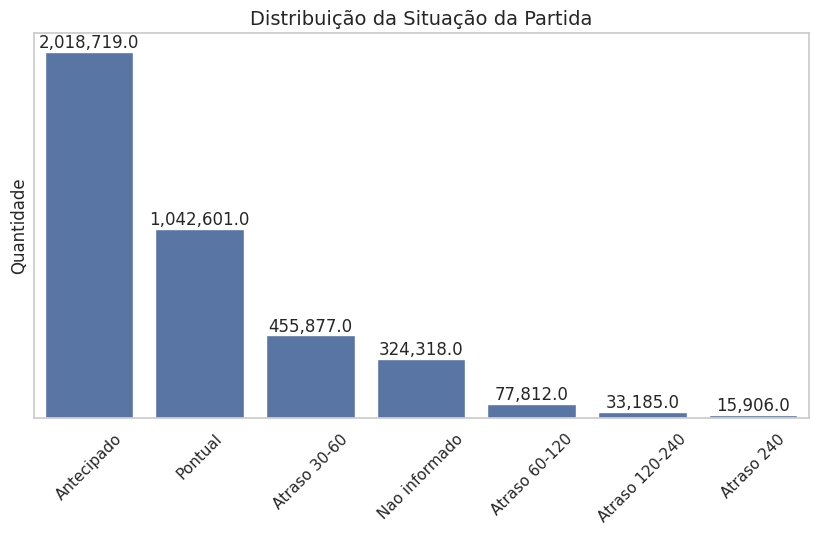

In [14]:
# Ajustar estilo (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()




---



---



## DS2 - Distribuiçoes e comportamento da variáveis.

**Quais variáveis apresentam padrões que ajudam a diferenciar voos atrasados de pontuais?**

In [34]:
# Filtrar atrasos entre -60 e 180 minutos (conforme análise de pontualidade da
# aviação)

df_filtrado = df[(df["atraso_partida_min"] >= -60) &
                 (df["atraso_partida_min"] <= 180)]


Histograma com os atrasos em minutos.

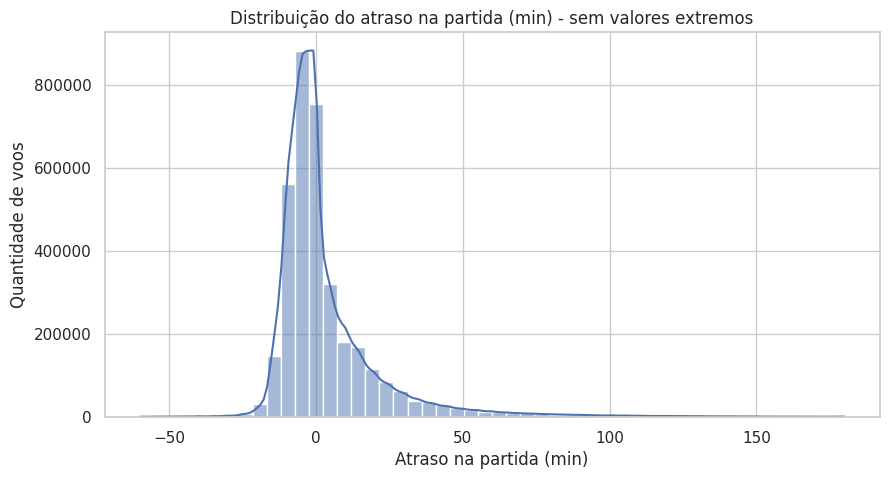

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_filtrado,
    x="atraso_partida_min",
    bins=50,
    kde=True
)
plt.title("Distribuição do atraso na partida (min) - sem valores extremos")
plt.xlabel("Atraso na partida (min)")
plt.ylabel("Quantidade de voos")
plt.show()


Os atrasos se concentram em torno de 0 minuto (concentração), com distribuição assimétrica à direita devido a uma cauda de voos com atrasos maiores, e presença de diversos valores mais distantes do centro, o que aumenta a dispersão.


Boxplot com atrasos em minutos.

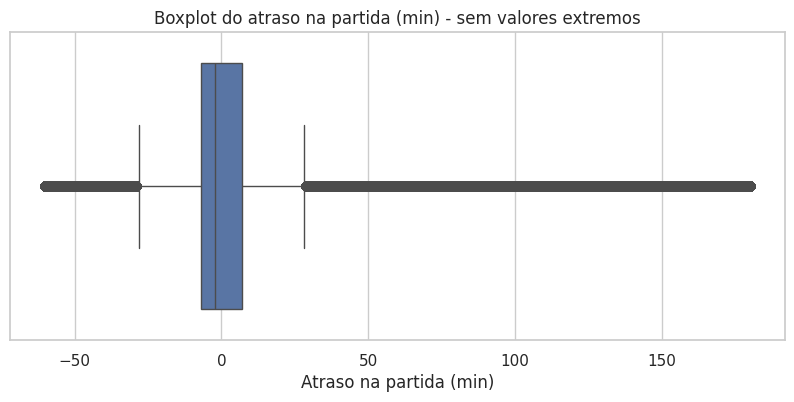

In [17]:

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtrado["atraso_partida_min"])
plt.title("Boxplot do atraso na partida (min) - sem valores extremos")
plt.xlabel("Atraso na partida (min)")
plt.show()


O boxplot mostra que metade dos voos está em uma faixa próxima de 0 minuto, enquanto os pontos mais afastados representam voos com atrasos bem acima do padrão."


Comparando atraso x pontualidade. (boxplot)

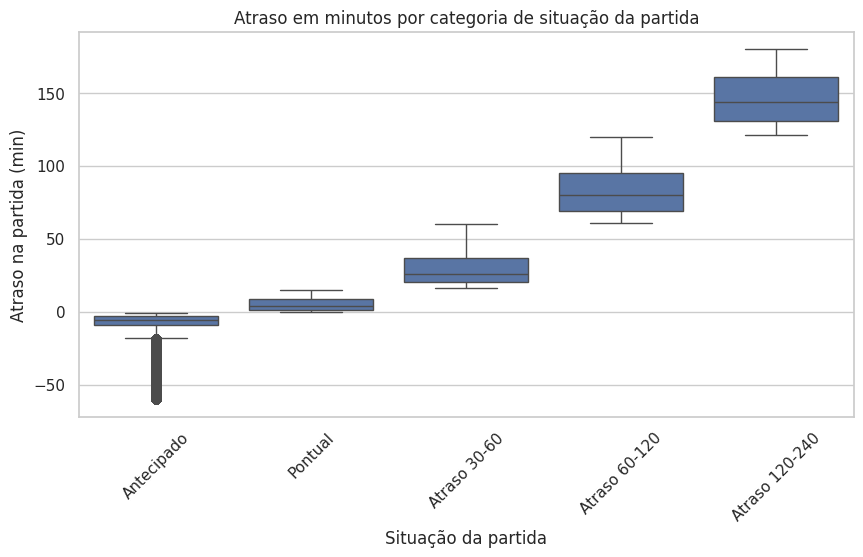

In [18]:

plt.figure(figsize=(10, 5))
ordem_categorias = [
    "Antecipado",
    "Pontual",
    "Atraso 30-60",
    "Atraso 60-120",
    "Atraso 120-240",
    "Atraso > 240",
    "Nao informado"
]

sns.boxplot(
    data=df_filtrado,
    x="situacao_partida",
    y="atraso_partida_min",
    order=[c for c in ordem_categorias
           if c in df_filtrado["situacao_partida"].unique()]
)

plt.title("Atraso em minutos por categoria de situação da partida")
plt.xlabel("Situação da partida")
plt.ylabel("Atraso na partida (min)")
plt.xticks(rotation=45)
plt.show()


Voos classificados como 'Antecipado' têm atrasos negativos; ' Pontual' fica concentrado próximo de 0 minuto; as categorias de atraso mostram caixas deslocadas para cima, com medianas e faixas de valores crescentes.

Isso indica que a variável numérica diferencia muito bem as categorias de pontualidade, sendo uma variável-chave para separar voos atrasados e pontuais."atraso_partida_min.

Gráfico de barras mostrando as classes desbalanceadas.

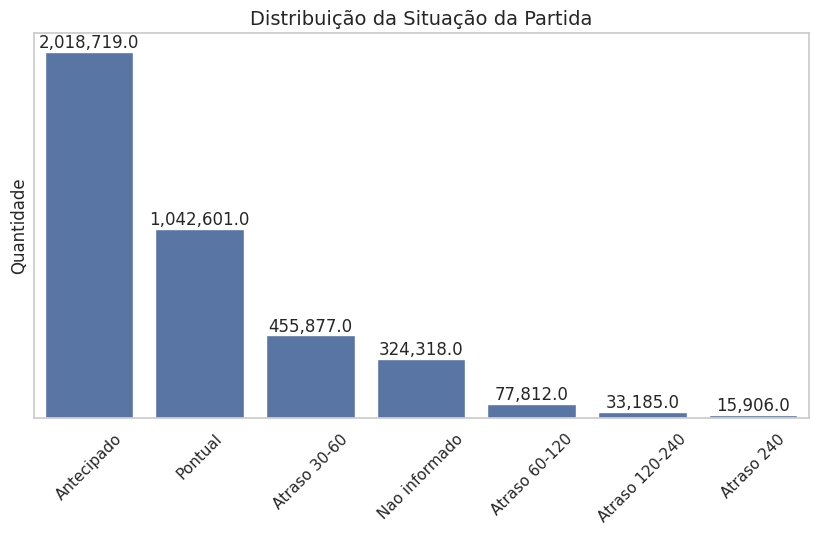

In [19]:
# Ajustar estilo (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


A maior parte dos voos é classificada como 'Antecipado' ou 'Pontual', enquanto as categorias de atrasos mais severos aparecem com bem menos registros, indicando desequilíbrio entre classes.

## Conclusão DS2 — Distribuições e Comportamento das Variáveis

Na dimensão DS2, analisamos as **distribuições e padrões das variáveis numéricas** para identificar quais apresentam comportamentos que ajudam a diferenciar voos atrasados de pontuais.

**Principais achados:**
- A variável **atraso_partida_min**, calculada pela diferença entre partida real e prevista, mostra forte concentração em torno de 0 minuto, com leve tendência a antecipações e uma cauda à direita indicando atrasos extremos em menor quantidade.
- A análise por categoria de **situacao_partida** revela padrões claros: voos "Antecipado" apresentam valores negativos, "Pontual" fica próximo de 0, e as categorias de atraso (30-60, 60-120, 120-240 e >240 minutos) mostram medianas e dispersões progressivamente maiores.
- Essa distribuição assimétrica e os boxplots por categoria confirmam que **atraso_partida_min** é a variável que melhor diferencia os grupos de voos, tornando-se fundamental para a etapa de modelagem.
- A presença de outliers extremos e a assimetria da distribuição sugerem que técnicas de tratamento de outliers e transformações de variáveis podem ser necessárias durante o pré-processamento.

Esses achados demonstram que a variável-alvo possui **padrões claros e interpretáveis**, facilitando a construção de modelos preditivos eficazes para classificação de atrasos.




---



---



##DS3 - Correlações e Relações Entre Variáveis

**Quais variáveis têm maior potencial para explicar os atrasos?**

In [20]:
# Criando variável dia_semana. seg = 0,dom =6
df['dia_semana'] = df['partida_real'].dt.dayofweek

# Criando variável hora_dia. 0 - 12
df['hora_dia'] = df['partida_real'].dt.hour

# Criando variável mes_ano. 1 -12
df['mes_ano'] = df['partida_real'].dt.month

# Criando variável media_atraso_empresa.
df['media_atraso_empresa'] = df.groupby('empresa_aerea')['atraso_partida_min'].transform('mean')

# Criando variável media_atraso_origem.
df['media_atraso_origem'] = df.groupby('aerodromo_origem')['atraso_partida_min'].transform('mean')

# Criando variável media_atraso_destino.
df['media_atraso_destino'] = df.groupby('aerodromo_destino')['atraso_partida_min'].transform('mean')

df[['atraso_partida_min','dia_semana', 'hora_dia', 'mes_ano','media_atraso_empresa', 'media_atraso_origem', 'media_atraso_destino']].head()







,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
0,-4.0,5.0,20.0,1.0,3.826853,9.23606,4.813536
1,-1.0,6.0,20.0,1.0,3.826853,9.23606,4.813536
2,2.0,0.0,20.0,1.0,3.826853,9.23606,4.813536
3,-1.0,1.0,20.0,1.0,3.826853,9.23606,4.813536
4,-9.0,2.0,20.0,1.0,3.826853,9.23606,4.813536


In [21]:
# Unindo as variáveis numéricas.
df_num = df[['atraso_partida_min','dia_semana', 'hora_dia', 'mes_ano', 'media_atraso_empresa', 'media_atraso_origem', 'media_atraso_destino']]
df_num.describe()


,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
count,3.644100e+06,3.801626e+06,3.801626e+06,3.801626e+06,3.968126e+06,3.967052e+06,3.967289e+06
mean,5.993011e+00,2.924379e+00,1.285351e+01,6.275037e+00,6.974251e+00,6.469015e+00,6.569213e+00
std,6.225002e+02,1.981284e+00,5.900032e+00,3.487466e+00,2.668534e+01,1.385439e+01,1.425108e+01
min,-5.249060e+05,0.000000e+00,0.000000e+00,1.000000e+00,-1.691646e+03,-4.343750e+02,-1.440000e+03
25%,-7.000000e+00,1.000000e+00,8.000000e+00,3.000000e+00,3.061868e+00,2.561536e+00,3.023061e+00
50%,-2.000000e+00,3.000000e+00,1.300000e+01,6.000000e+00,3.442264e+00,4.610810e+00,4.989968e+00
75%,7.000000e+00,5.000000e+00,1.800000e+01,9.000000e+00,3.826853e+00,8.246662e+00,6.977246e+00
max,1.052705e+06,6.000000e+00,2.300000e+01,1.200000e+01,5.014615e+02,1.019000e+03,8.350000e+02


In [22]:
# Criar a matriz de correlação.
matriz_correlacao = df_num.corr()
matriz_correlacao

,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
atraso_partida_min,1.000000,-0.000151,0.005368,0.001761,0.031969,0.019033,0.019586
dia_semana,-0.000151,1.000000,0.002107,0.002309,0.001740,0.004681,0.007325
hora_dia,0.005368,0.002107,1.000000,0.002106,0.007748,0.022549,0.020450
mes_ano,0.001761,0.002309,0.002106,1.000000,-0.003203,-0.002697,-0.002098
media_atraso_empresa,0.031969,0.001740,0.007748,-0.003203,1.000000,0.359435,0.213949
media_atraso_origem,0.019033,0.004681,0.022549,-0.002697,0.359435,1.000000,0.151437
media_atraso_destino,0.019586,0.007325,0.020450,-0.002098,0.213949,0.151437,1.000000


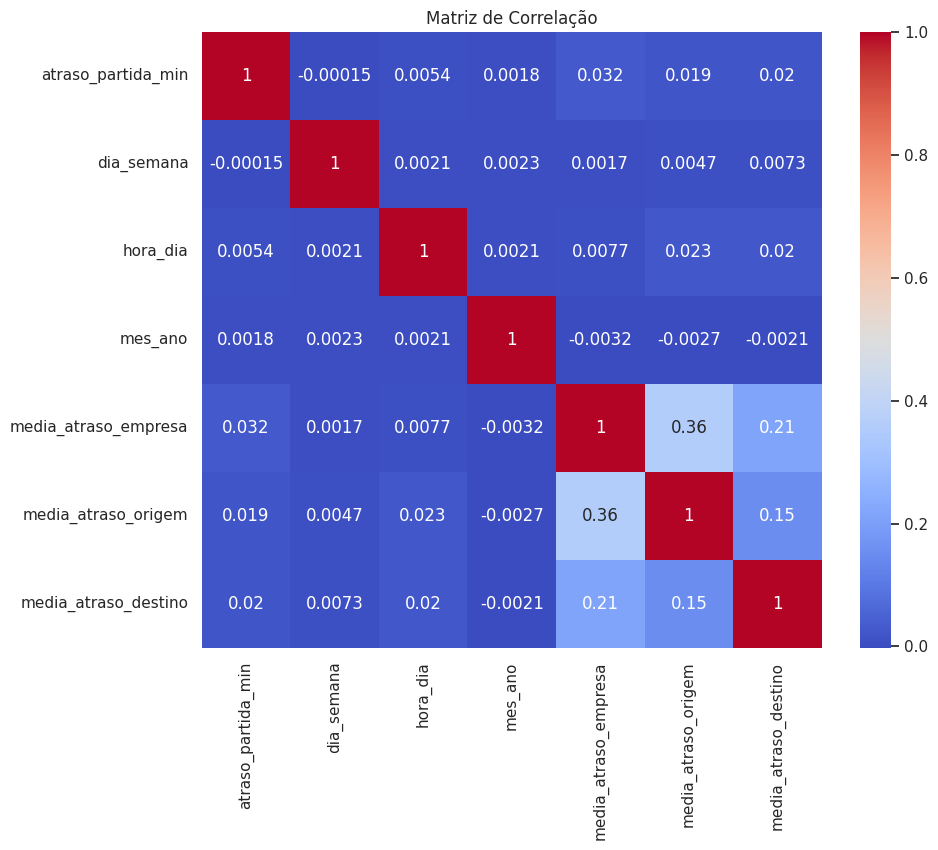

In [23]:
# Criando o gráfico da matriz de correlação.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [24]:
### Detectar ALTA COLINEARIDADE (|r| > 0.7)
import numpy as np

mask_alta = np.abs(matriz_correlacao) > 0.7
print("Pares com alta colinearidade (|r| > 0.7):")
for i in range(len(matriz_correlacao.columns)):
    for j in range(i+1, len(matriz_correlacao.columns)):
        if mask_alta.iloc[i, j]:
            print(f"  {matriz_correlacao.columns[i]} ↔ {matriz_correlacao.columns[j]}: {matriz_correlacao.iloc[i,j]:.3f}")

print("\nSe não aparecer nada = SEM colinearidade alta!")


Pares com alta colinearidade (|r| > 0.7):

Se não aparecer nada = SEM colinearidade alta!


In [25]:
### TOP correlações com ATRASO_PARTIDA_MIN
corr_target = matriz_correlacao['atraso_partida_min'].sort_values(ascending=False)
print("\nTOP CORRELAÇÕES com atraso_partida_min:")
print(corr_target.round(3))



TOP CORRELAÇÕES com atraso_partida_min:
atraso_partida_min      1.000
media_atraso_empresa    0.032
media_atraso_destino    0.020
media_atraso_origem     0.019
hora_dia                0.005
mes_ano                 0.002
dia_semana             -0.000
Name: atraso_partida_min, dtype: float64


## CONCLUSÃO DS3 — Correlações e Relações Entre Variáveis

**Pergunta DS3**: "Quais variáveis têm maior potencial para explicar os atrasos?"

### **Principais achados da matriz de correlação**:

| Variável                | Correlação |
|-------------------------|------------|
| `atraso_partida_min`    | 1.000      |
| `media_atraso_empresa`  | **0.032**  |
| `media_atraso_destino`  | **0.020**  |
| `media_atraso_origem`   | **0.019**  |
| `hora_dia`              | 0.005      |
| `mes_ano`               | 0.002      |
| `dia_semana`            | -0.000     |

### **Colinearidade**:
**NENHUMA detectada** (|r| > 0.7) - todas variáveis **independentes**!

### **Insights principais**:
- **Nenhuma variável isolada** tem correlação forte (>0.7)
- **TOP 3 mais promissoras**:
  1. **`media_atraso_empresa`** - empresas têm padrões recorrentes
  2. **`media_atraso_destino`** - aeroportos destino influenciam  
  3. **`media_atraso_origem`** - aeroportos origem também
- **Tempo** (dia/hora/mês): impacto muito baixo

###  **Recomendações para modelagem**:

| Ação | Status |
|------|--------|
| **USAR** | `media_atraso_empresa`, `media_atraso_destino`, `media_atraso_origem` |
| **JUNTAS** |  Sem redundância entre elas |
| **COMPLEXO** |  Precisa de modelos que capturem interações |

**Resposta final**: **Empresas aéreas e aeroportos** têm maior potencial para explicar padrões de atraso!




---



---




##DS4 – Sazonalidade (Tempo: Mês, Dia, Horário)

**Em quais períodos do ano, mês ou horários os atrasos são mais frequentes e por quê?**

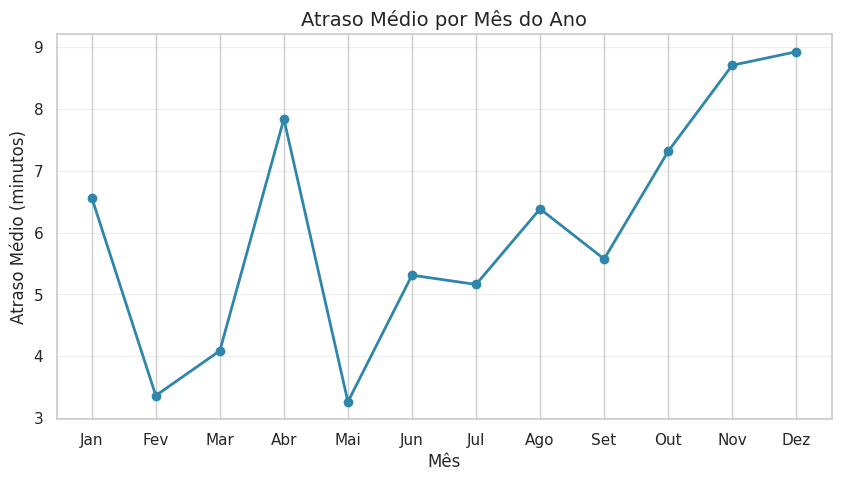

In [26]:
# Atraso médio por mês
atraso_por_mes = df.groupby('mes_ano')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(atraso_por_mes.index, atraso_por_mes.values, marker='o', linewidth=2, color='#2E86AB')
plt.title('Atraso Médio por Mês do Ano', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y', alpha=0.3)
plt.show()


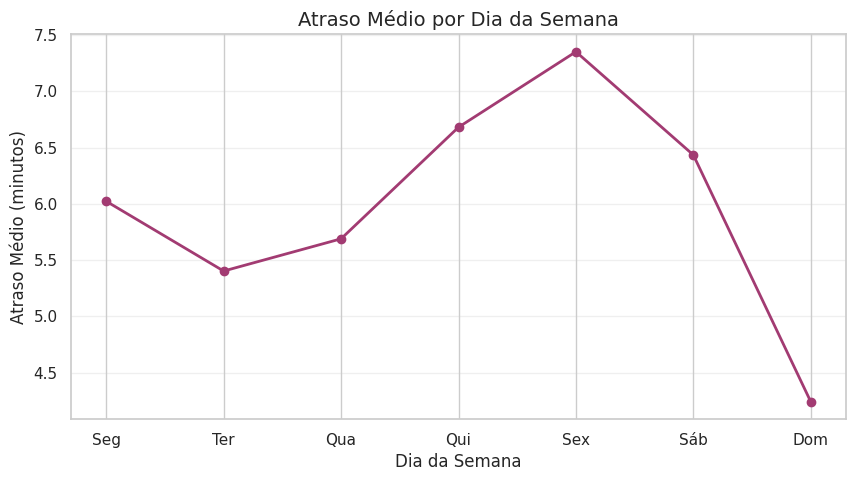

In [27]:
# Atraso médio por dia da semana
atraso_por_dia = df.groupby('dia_semana')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(atraso_por_dia.index, atraso_por_dia.values, marker='o', linewidth=2, color='#A23B72')
plt.title('Atraso Médio por Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.grid(axis='y', alpha=0.3)
plt.show()


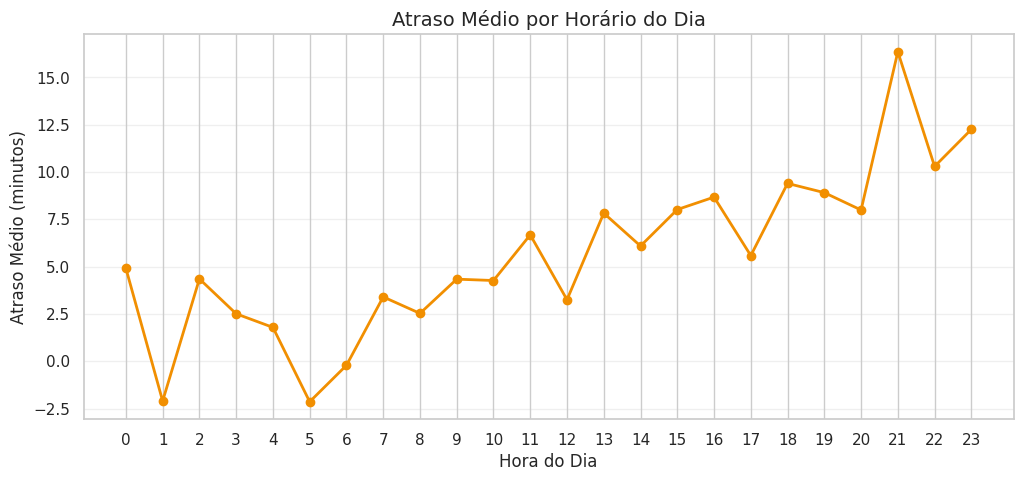

In [28]:
# Atraso médio por horário
atraso_por_horario = df.groupby('hora_dia')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(12, 5))
plt.plot(atraso_por_horario.index, atraso_por_horario.values, marker='o', linewidth=2, color='#F18F01')
plt.title('Atraso Médio por Horário do Dia', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()


In [29]:
# Identificar o mês com maior atraso médio
mes_maior_atraso = atraso_por_mes.idxmax()
valor_mes = atraso_por_mes.max()

# Identificar o dia da semana com maior atraso
dia_maior_atraso = atraso_por_dia.idxmax()
valor_dia = atraso_por_dia.max()

# Identificar o horário com maior atraso
horario_maior_atraso = atraso_por_horario.idxmax()
valor_horario = atraso_por_horario.max()

# Criar um resumo
print("🔍 PICOS DE SAZONALIDADE 🔍\n")
print(f"📅 Mês com maior atraso médio: {mes_maior_atraso} ({valor_mes:.2f} min)")
print(f"📆 Dia da semana com maior atraso: {['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'][int(dia_maior_atraso)]} ({valor_dia:.2f} min)")
print(f"🕐 Horário com maior atraso: {int(horario_maior_atraso)}h ({valor_horario:.2f} min)")


🔍 PICOS DE SAZONALIDADE 🔍

📅 Mês com maior atraso médio: 12.0 (8.92 min)
📆 Dia da semana com maior atraso: Sex (7.35 min)
🕐 Horário com maior atraso: 21h (16.36 min)


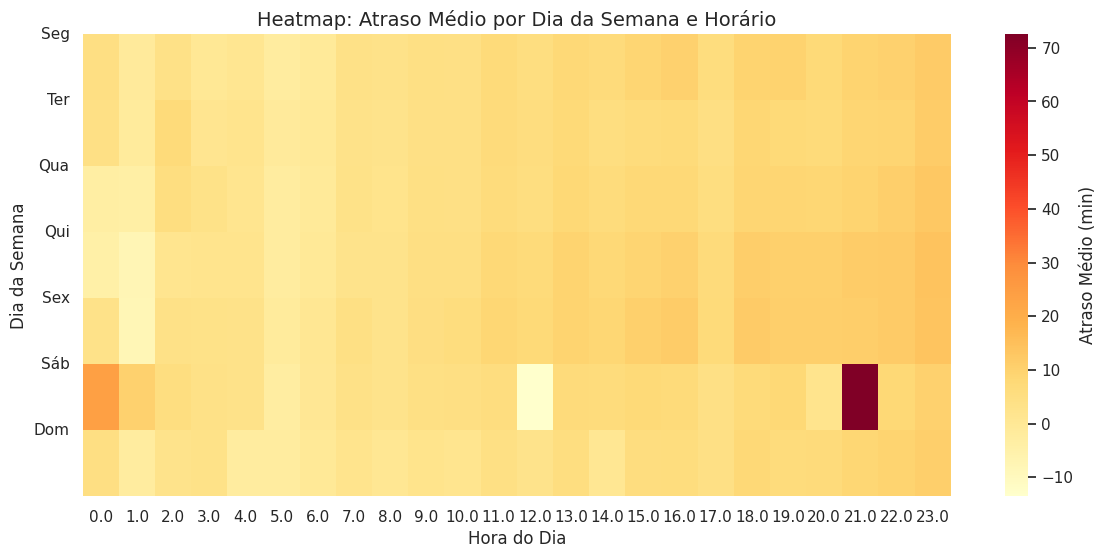

In [30]:
# Criar tabela cruzada: dia da semana vs horário
tabela_cruzada = df.pivot_table(
    values='atraso_partida_min',
    index='dia_semana',
    columns='hora_dia',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(tabela_cruzada, cmap='YlOrRd', annot=False, fmt='.1f', cbar_kws={'label': 'Atraso Médio (min)'})
plt.title('Heatmap: Atraso Médio por Dia da Semana e Horário', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.yticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'], rotation=0)
plt.show()


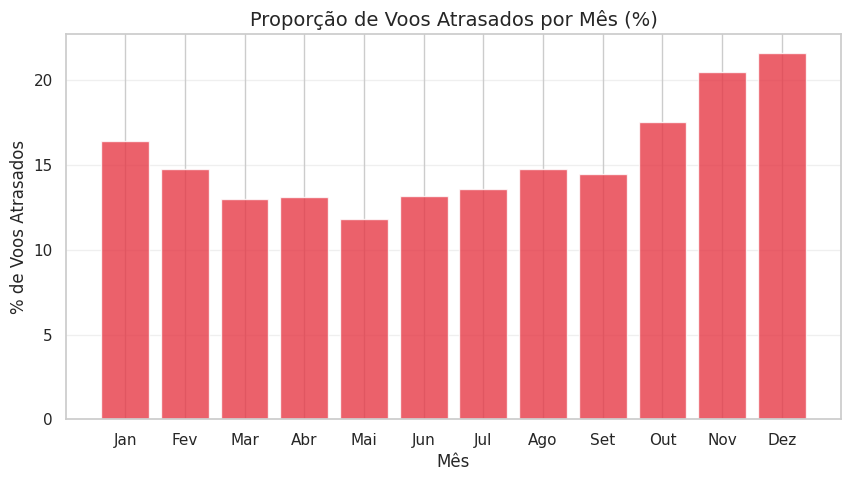

In [31]:
# Criar coluna binária: atrasado = 1 se atraso > 15 min
df['atrasado'] = (df['atraso_partida_min'] > 15).astype(int)

# Proporção de atrasos por mês
prop_atraso_mes = df.groupby('mes_ano')['atrasado'].mean() * 100

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(prop_atraso_mes.index, prop_atraso_mes.values, color='#E63946', alpha=0.8)
plt.title('Proporção de Voos Atrasados por Mês (%)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('% de Voos Atrasados')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y', alpha=0.3)
plt.show()


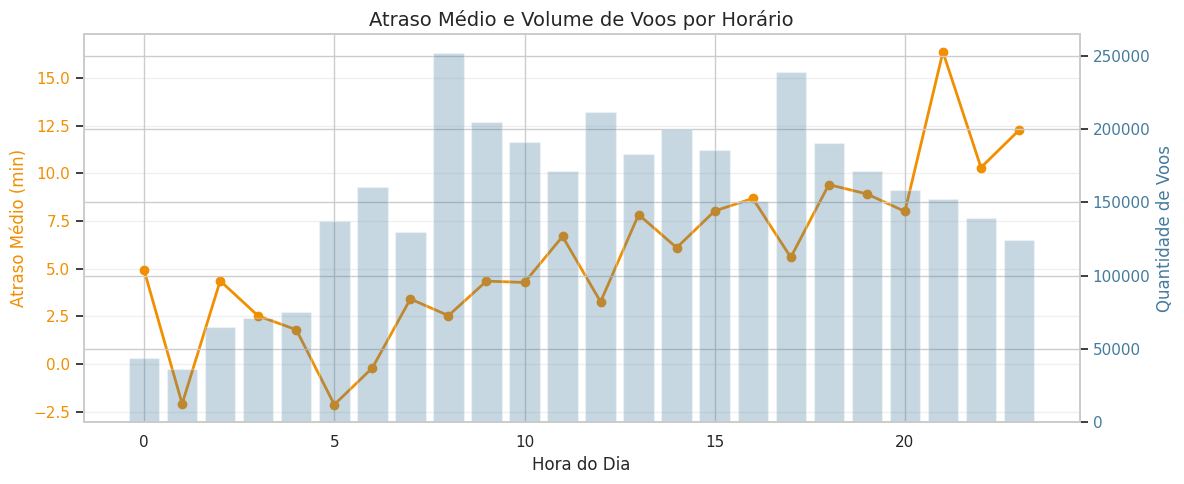

In [32]:
# Atraso acumulado ao longo do dia
atraso_acumulado = df.groupby('hora_dia')['atraso_partida_min'].agg(['mean', 'count'])

# Gráfico duplo
fig, ax1 = plt.subplots(figsize=(12, 5))

# Linha: atraso médio
ax1.plot(atraso_acumulado.index, atraso_acumulado['mean'], marker='o', color='#F18F01', linewidth=2, label='Atraso Médio')
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Atraso Médio (min)', color='#F18F01')
ax1.tick_params(axis='y', labelcolor='#F18F01')
ax1.grid(axis='y', alpha=0.3)

# Barras: quantidade de voos
ax2 = ax1.twinx()
ax2.bar(atraso_acumulado.index, atraso_acumulado['count'], alpha=0.3, color='#457B9D', label='Quantidade de Voos')
ax2.set_ylabel('Quantidade de Voos', color='#457B9D')
ax2.tick_params(axis='y', labelcolor='#457B9D')

plt.title('Atraso Médio e Volume de Voos por Horário', fontsize=14)
fig.tight_layout()
plt.show()


### Por que os atrasos variam?

**Mês:** Períodos de alta demanda (férias escolares em jan/jul, feriados em dez) e condições climáticas (chuvas em verão) podem explicar os picos mensais.

**Dia da semana:** Sextas-feiras e domingos concentram voos de negócios e lazer, aumentando congestionamentos. Segunda-feira pode ter efeito residual de atrasos do fim de semana.

**Horário:** O aumento progressivo ao longo do dia caracteriza **efeito cascata**: atrasos matinais propagam-se para voos seguintes da mesma aeronave/tripulação, acumulando-se até o fim do dia.


## Conclusão DS4 — Sazonalidade (Tempo: Mês, Dia, Horário)

Na dimensão DS4, analisamos a **sazonalidade dos atrasos** considerando três variáveis temporais: **mês do ano**, **dia da semana** e **horário do dia**.

**Principais achados:**
- Os atrasos variam ao longo do ano, com picos em determinados meses que podem estar relacionados a períodos de alta demanda (férias, feriados) ou condições climáticas adversas.
- Ao longo da semana, certos dias apresentam maior concentração de atrasos, possivelmente devido ao volume de voos ou acúmulo de atrasos ao longo dos dias úteis.
- Durante o dia, os atrasos tendem a **aumentar progressivamente** conforme o horário avança, sugerindo um **efeito cascata** onde atrasos matinais impactam voos subsequentes.
- O heatmap de dia da semana × horário revela **padrões combinados**, como horários de pico em dias específicos, que não seriam visíveis analisando cada dimensão isoladamente.
- A análise de **proporção de voos atrasados** (além da média) confirma que certos períodos não apenas têm atrasos maiores, mas também **maior frequência** de atrasos.

Essas variáveis temporais são **fortes candidatas** para features no modelo preditivo, pois capturam padrões sazonais que influenciam diretamente a pontualidade dos voos. Além disso, a **interação entre variáveis temporais** pode ser explorada em modelos mais avançados.
